In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/goog4_request&X-Goog-Date=20250216T095825Z&X-Goog-Expires=259200&X-Goog-SignedHeaders=host&X-Goog-Signature=05da361f2cf24eb2bb8655ee7d3e44944d24a8222e858ae6d72c727326.csv")



In [4]:
# 1. General Information
print("=== General Information ===")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print("\nMissing values per column:")
print(df.isnull().sum())

=== General Information ===
Rows: 920
Columns: 16

Missing values per column:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [7]:


# 2. Target Variable Analysis
# Create a binary target variable (0 = no disease, 1 = disease present)
df['heart_disease'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
print("\n=== Target Variable Analysis ===")
target_dist = df['heart_disease'].value_counts()
print("Distribution of heart disease:")
print(target_dist)
print(f"\nPatients without heart disease: {target_dist[0]}")
print(f"Patients with heart disease: {target_dist[1]}")


=== Target Variable Analysis ===
Distribution of heart disease:
heart_disease
1    509
0    411
Name: count, dtype: int64

Patients without heart disease: 411
Patients with heart disease: 509



=== Demographic Insights ===
Age range: 28 - 77

Gender distribution:
sex
Male      726
Female    194
Name: count, dtype: int64

=== Health Metrics ===

trestbps:
Average: 132.13
Median: 130.0

chol:
Average: 199.13
Median: 223.0

thalch:
Average: 137.55
Median: 140.0

=== Categorical Features ===

Exercise-induced angina (exang):
exang
False    528
True     337
Name: count, dtype: int64

Chest pain types (cp):
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


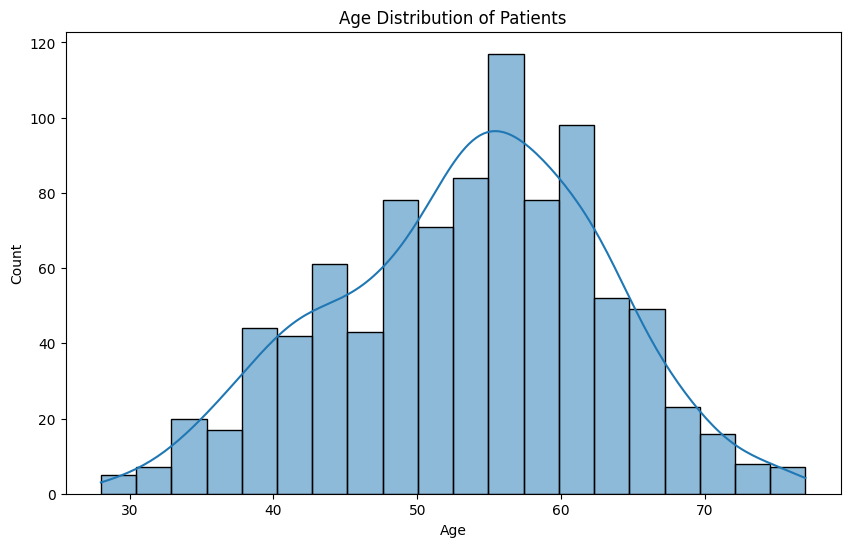

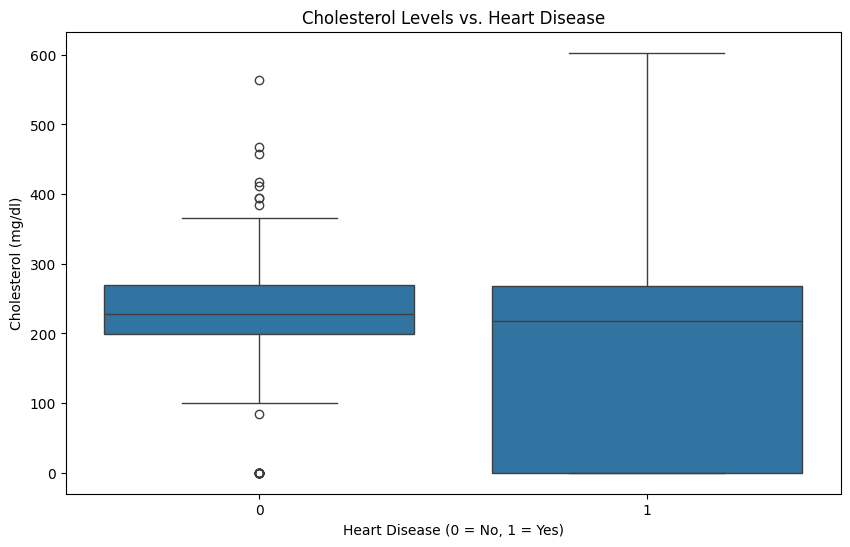


=== Outliers Detection ===
Outliers in cholesterol: 183
Outliers in resting blood pressure: 28


In [8]:
# 3. Demographic Insights
print("\n=== Demographic Insights ===")
print(f"Age range: {df['age'].min()} - {df['age'].max()}")
print("\nGender distribution:")
print(df['sex'].value_counts())



In [9]:
# 4. Health Metrics
print("\n=== Health Metrics ===")
metrics = ['trestbps', 'chol', 'thalch']
for col in metrics:
    print(f"\n{col}:")
    print(f"Average: {df[col].mean():.2f}")
    print(f"Median: {df[col].median()}")









=== Health Metrics ===

trestbps:
Average: 132.13
Median: 130.0

chol:
Average: 199.13
Median: 223.0

thalch:
Average: 137.55
Median: 140.0


In [10]:
# 5. Categorical Features
print("\n=== Categorical Features ===")
print("\nExercise-induced angina (exang):")
print(df['exang'].value_counts())
print("\nChest pain types (cp):")
print(df['cp'].value_counts())


=== Categorical Features ===

Exercise-induced angina (exang):
exang
False    528
True     337
Name: count, dtype: int64

Chest pain types (cp):
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


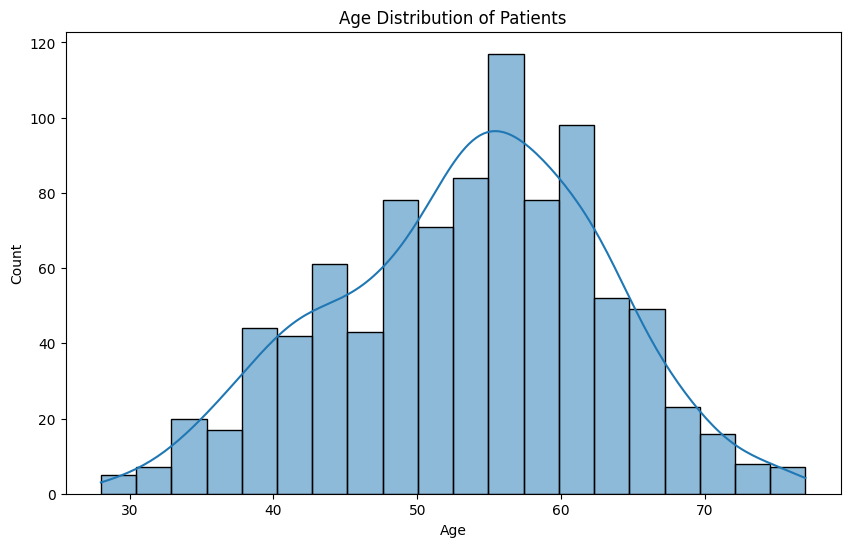

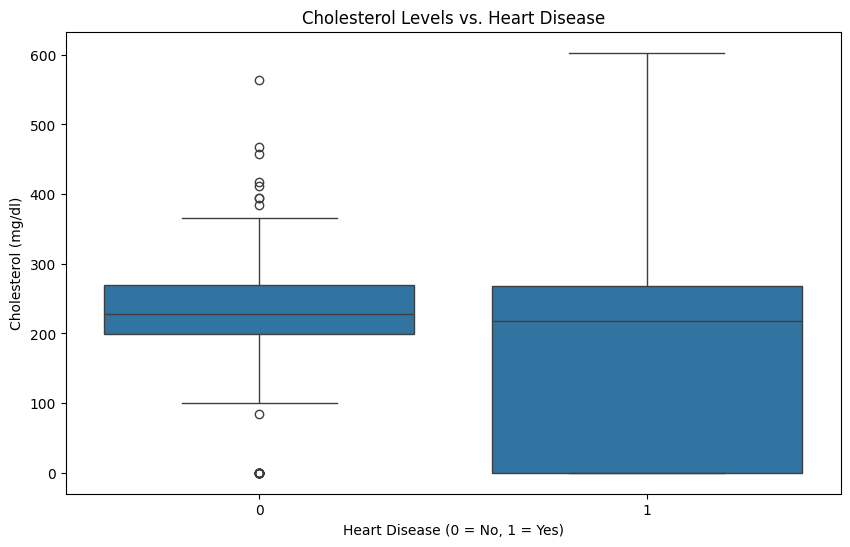

In [11]:
# 6. Visual Analysis
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Cholesterol levels comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='heart_disease', y='chol', data=df)
plt.title('Cholesterol Levels vs. Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol (mg/dl)')
plt.show()


In [12]:
# 7. Outliers Detection
print("\n=== Outliers Detection ===")
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers.shape[0]

print(f"Outliers in cholesterol: {detect_outliers('chol')}")
print(f"Outliers in resting blood pressure: {detect_outliers('trestbps')}")



=== Outliers Detection ===
Outliers in cholesterol: 183
Outliers in resting blood pressure: 28
